Nombre: Gregorio Aarón Meza Ramos


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma

# Números pseudoaleatorios
## Ejercicio 1

El método del cuadrado nos permite obtener una sucesión de números aleatorios entre 0 y 9999. Este método fue desarrollado por J. Von Neuman, S. Ulm y N. Metropolis en 1964 en Los Alamos Laboratory, para simular colisiones de neutrones, como parte del proyecto Manhattan.  El gran problema de este método es que siempre degenera a cero, pero dependiendo de la semilla podría ser que la cantidad de pasos sea tan grande como queramos. 

- Programe una función que, dada una semilla y un cierto máximo número $N$, devuelva una sucesión de números aleatorios en $[0,1]$ a lo más $N$ elementos.
- Si usamos como semilla $x_0=4450$  ¿Cuánto tiempo tardará en degenerar a cero? ¿Si usamos $x_0=4451$? ¿ Qué puedes conlcuir de esto?
- Muestre que este método aproxima la distribución uniforme.<br/>
Para esto, aproxime la función de distribución acumulada, dada por 
	$$
	F_U(z)=P\left[\{\omega \in \Omega: U(\omega)\leq z\}\right], \qquad z\in \mathbb{R}
	$$
	usando frecuencias relativas de aparición. 



**Inciso I**


Vamos a empezar escribiendo una función en Python que siga los pasos del Método del Cuadrado visto en clase. Recordando los pasos:


- Se empieza con un número $x_0$, al que se le llama semilla
- Elevamos al  cuadrado al número $x_0$ para poder obtener un número de 8 dígitos, si tiene menos se agregan ceros a la izquierda
- Tomamamos los cuatro dígitos de en medio y este será nuestro $x_1$
- Se sigue de manera recurisva hasta que llegamos a un tope que en nuestra implementación es un número entero $N$

In [2]:
'''
Implemetanción:
El input de la función es la semilla y el número de iteraciones que quiero que repita el Metodo
El output es una lista de numeros que se encuentran entre 0 y 1 
'''
#Comienza la función
def generador_cuadrado(x_0, N): # Los parametros de la función x_0 que es la semilla, N el tope de iteraciones
    i = 0 # contador del número de iteraciones que se hace el Método cuando esa i llegue al valor de N, la función se detiene
    x_0 = x_0**2 # Primer paso del Algoritmo, la semilla se eleva al cuadrado
    x_0 = str(x_0) # se convierte en tipo cadena para poder acceder a los número de en medio 
    numeros_generados = [] # lista que va a ir almacenando los numeros pseudoaleatorios generados con el método
    # Aqui empieza el while que controla las veces que se repite el algortimo
    while i < N: # si se cumple que i sea menor al tope se ejecuta lo que está adentro del while
        while len(x_0) < 8: # while para llenar de ceros de lado izquierdo el número si es que no cumple con tener 8 dígitos.
            x_0 = "0" + x_0
        numeros_generados.append(int(x_0[2:6])) # se accede a la cadena y se agregan los digitos de en medio a la lista numeros_generados
        x_0 = int(x_0[2:6]) # se convierte en entero 
        x_0 = x_0**2 # se eleva al cuadrado
        x_0 = str(x_0) # se pasa a tipo cadena otra vez
        i = i + 1 # se terminó la primera iteración y se aumenta en 1 el contador de i

    # Una vez terminado el bloque de arriba escalamos los numeros que generamos para que se encuentren entre el 0 y 1 
    numeros_normalizados = [ n/10000 for n in numeros_generados]
    return numeros_normalizados # culmina la función y te regresa la lista de numeros pseudoaleatorios entre 0 y 1 

**Inciso II**

Ya que tenemos escrita la función para generar números pseudoaleatorios entre 0 y 1, la vamos a usar para la semilla $x_0 = 4450$ y veremos cuántas iteraciones nos lleva para que este método nos regrese puros ceros. Del codigo de abajo notamos que con esa semilla y con 2000 numeros por generar le toma 21 iteraciones al algoritmo degenerar al cero.

In [3]:
listaPrueba1 = generador_cuadrado(4450,2000)
contador = 0
for num in listaPrueba1:
    if num != 0: 
        contador = contador + 1
print(contador)
print(listaPrueba1)

21
[0.8025, 0.4006, 0.048, 0.2304, 0.3084, 0.511, 0.1121, 0.2566, 0.5843, 0.1406, 0.9768, 0.4138, 0.123, 0.5129, 0.3066, 0.4003, 0.024, 0.0576, 0.3317, 0.0024, 0.0005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [4]:
listaPrueba2 = generador_cuadrado(4451,2000)
print(listaPrueba2)

[0.8114, 0.8369, 0.0401, 0.1608, 0.5856, 0.2927, 0.5673, 0.1829, 0.3452, 0.9163, 0.9605, 0.256, 0.5536, 0.6472, 0.8867, 0.6236, 0.8876, 0.7833, 0.3558, 0.6593, 0.4676, 0.8649, 0.8052, 0.8347, 0.6724, 0.2121, 0.4986, 0.8601, 0.9772, 0.4919, 0.1965, 0.8612, 0.1665, 0.7722, 0.6292, 0.5892, 0.7156, 0.2083, 0.3388, 0.4785, 0.8962, 0.3174, 0.0742, 0.5505, 0.305, 0.3025, 0.1506, 0.268, 0.1824, 0.3269, 0.6863, 0.1007, 0.014, 0.0196, 0.0384, 0.1474, 0.1726, 0.979, 0.8441, 0.2504, 0.27, 0.29, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.

Al usar la semilla $x_0 = 4451$ y $N = 2000$ pasa algo que se me hizo bastante curioso, ya que esperaba que el algortimo te regrese puros ceros al paso de cierta iteración, lo que en realidad pasa es que llega a una iteración $k$  de tal forma que para las siguientes se repiten 4 números pseudoaleatorios en periodo. Es por eso que en el código de arriba usamos el **print** para ver la lista que nos regresa, pues notamos que para el número 0.29 hacia adelante empieza el número  0.41, luego  0.81,  después 0.61 y al final 0.21 y se repiten de nuevo

**Inciso III**

Para comprobar que este método se aproxima a una distribución uniforme, vamos a programar la función de distribución acumulada dada por  frecuencias relativas de aparición. Esta implementación tiene como inputs una lista de numeros pseudoaleatorios y un número arbitrario $z$ entre 0 y 1 

In [5]:
'''
Implementación de la función de distribución acumulada
'''
def aproximacion(lista, z):
    return sum([1 if u <= z else 0 for u in lista])/len(lista)

In [5]:
'''
Para hacer uso de nuestra función de aproximación vamos a generar dos listas de prueba con nuestra función implementada arriba 
en este caso nuestra semilla es 4876 y va a generar 100 números, y la otra toma semilla 5124 y generará 100000


le asiganmos nombres a las listas que generamos y las mandamos a imprimir
'''
lista_prueba = generador_cuadrado(4876,100)
lista_prueba2 = generador_cuadrado(4876, 5000)
print(lista_prueba)
print(lista_prueba2)

[0.7753, 0.109, 0.1881, 0.5381, 0.9551, 0.2216, 0.9106, 0.9192, 0.4928, 0.2851, 0.1282, 0.6435, 0.4092, 0.7444, 0.4131, 0.0651, 0.4238, 0.9606, 0.2752, 0.5735, 0.8902, 0.2456, 0.0319, 0.1017, 0.0342, 0.1169, 0.3665, 0.4322, 0.6796, 0.1856, 0.4447, 0.7758, 0.1865, 0.4782, 0.8675, 0.2556, 0.5331, 0.4195, 0.598, 0.7604, 0.8208, 0.3712, 0.7789, 0.6685, 0.6892, 0.4996, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16, 0.56, 0.36, 0.96, 0.16]
[0.7753, 0.109, 0.1881, 0.5381, 0.9551, 0.2216, 0.9106, 0.9192, 0.4928, 0.2851, 0.1282, 0.6435, 0.4092, 0.7444, 0.4131, 0.0651, 0.4238, 0.9606, 0.2752, 0.5735, 0.8902, 0.2456, 0.0319, 0.1017, 0.0342, 0.1169, 0.3665, 0.4322, 0.6796, 0.1856, 0.4447, 0.7758, 0.1865, 0.4782, 0.8675, 0.2556, 0.5331, 0.4195, 0.598

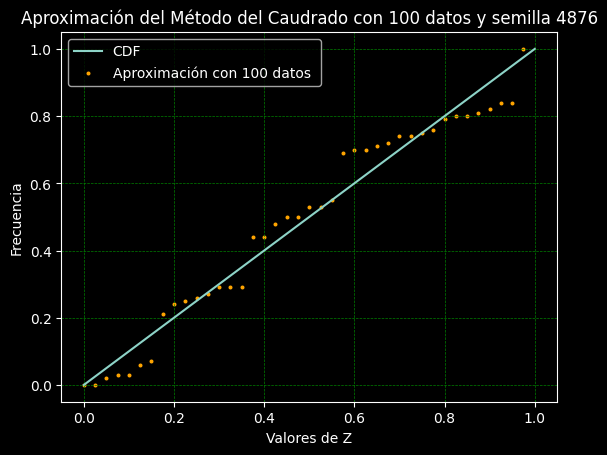

In [9]:
## Gráficación de la función de distribución Acumulada de una variable aleatoria uniforme entre el 0 y 1
# -----------------------------------------------------------------------------------------#
# Parámetros de la variable aleatoria uniforme
a = 0  # Límite inferior del intervalo
b = 1  # Límite superior del intervalo

# Genera datos para la CDF
x = np.linspace(a, b, 1000)  # Valores de x en el intervalo [a, b]
cdf = np.zeros_like(x)  # Inicializa la CDF con ceros

# Calcula la CDF
cdf[x >= a] = (x[x >= a] - a) / (b - a)
cdf[x > b] = 1  # La CDF es 1 para valores mayores que b

# Grafica la CDF
plt.style.use('dark_background')
plt.plot(x, cdf, label='CDF')
plt.xlabel('Valores')
plt.ylabel('Probabilidad acumulada')
plt.title('Aproximación del Método del Caudrado con 100 datos y semilla 4876')

# -----------------------------------------------------------------------------------------#

## ------------------- Gráficación de la Aproximación ------------------- ##
z = np.arange(0, 1, 0.025)
aproximaciones =  [aproximacion(lista_prueba, num) for num in z]
plt.scatter(z, aproximaciones,label = "Aproximación con 100 datos " ,s = 3.5, c = "orange")

plt.xlabel("Valores de Z")
plt.ylabel("Frecuencia")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()
# -----------------------------------------------------------------------------------------#


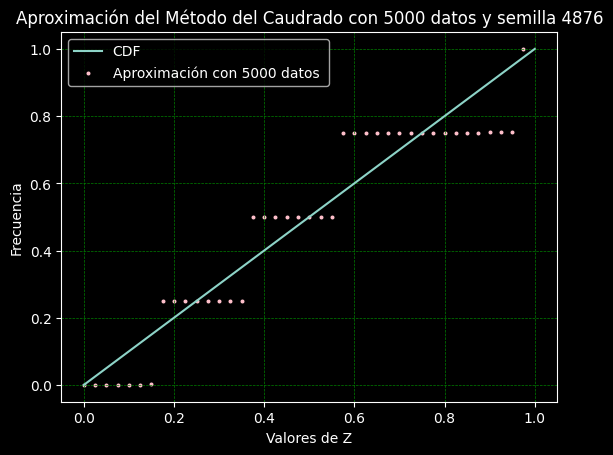

In [11]:

## Gráficación de la función de distribución Acumulada de una variable aleatoria uniforme entre el 0 y 1
# -----------------------------------------------------------------------------------------#
# Parámetros de la variable aleatoria uniforme
a = 0  # Límite inferior del intervalo
b = 1  # Límite superior del intervalo

# Genera datos para la CDF
x = np.linspace(a, b, 1000)  # Valores de x en el intervalo [a, b]
cdf = np.zeros_like(x)  # Inicializa la CDF con ceros

# Calcula la CDF
cdf[x >= a] = (x[x >= a] - a) / (b - a)
cdf[x > b] = 1  # La CDF es 1 para valores mayores que b

# Grafica la CDF
plt.style.use('dark_background')
plt.plot(x, cdf, label='CDF')
plt.xlabel('Valores')
plt.ylabel('Probabilidad acumulada')
plt.title('Aproximación del Método del Caudrado con 5000 datos y semilla 4876')

# -----------------------------------------------------------------------------------------#

## ------------------- Gráficación de la Aproximación ------------------- ##
z = np.arange(0, 1, 0.025)
aproximaciones =  [aproximacion(lista_prueba2, num) for num in z]
plt.scatter(z, aproximaciones,label = "Aproximación con 5000 datos " ,s = 3.5, c = "pink")
plt.xlabel("Valores de Z")
plt.ylabel("Frecuencia")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()
# -----------------------------------------------------------------------------------------#


Lo que podemos notar es que a medida que la cantidad de números pseudoaleatorios aumenta los puntos se acercan más a la gráfica de función de distribución acumulada. Aun que en esta última gráfica los puntos parecen que están alineados horizontalemente esto se debe a que con este método llega un momento en que los números se repiten en periodo.

Por lo tanto podemos concluir que este método se aproxima a la distribución uniforme

## Ejercicio 2

Usando números pseudoaleatorios, aproxime el valor de la integral 
$$
\int_{0}^{0.55}\tfrac{\Gamma(100)}{\Gamma(50)\Gamma(50)}x^{49}(1-x)^{49}dx,
$$
que corresponde a la probabilidad de que una variable aleatoria con distribución $Beta(50,50)$ tome valores menores que $0.55$.


**Solución**


Vamos a comenzar desarrollando la integral, sacando constantes en nuestro caso las funciones gammas son constantes, por lo tanto queda de la siguiente manera: 

$$
\int_{0}^{0.55}\tfrac{\Gamma(100)}{\Gamma(50)\Gamma(50)}x^{49}(1-x)^{49}dx = \tfrac{\Gamma(100)}{\Gamma(50)\Gamma(50)}\int_{0}^{0.55}x^{49}(1-x)^{49}dx
$$


Ahora para resolver la integral que nos queda a la derecha usando el método montecarlo. 



Lo que buscamos es un número $M$ tal que $f(x) < M$. Vamos a empezar graficando la función

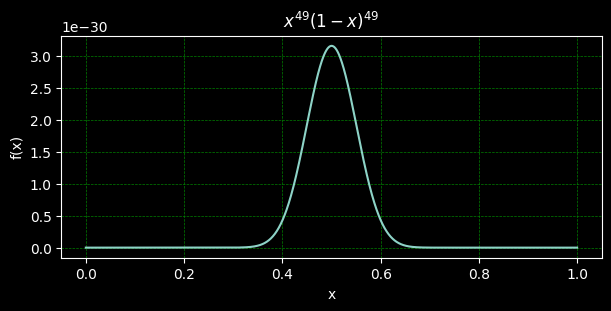

In [9]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')  
ax.set_title("")
#M = 3.1554436208840472e-30
datos_x = np.arange(0,1,0.0005)
datos_y = [(ma.pow(x,49)*(ma.pow(1-x,49))) for x in datos_x]
plt.plot(datos_x,datos_y)
#plt.plot(datos_x, [M for x in datos_x])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$x^{49}(1-x)^{49}$ ")
plt.show()

Para buscar $M $ vamos a usar los datos que obtuvimos de graficar la función, dado que tenemos los datos que toma la función en el eje Y desde Python estos datos están almacenados en una lista, haciendo uso de la función **max** obtenemos la $M$ conveniente

In [10]:
M = max(datos_y)
print(f'Nuestro valor de M es {M}')

Nuestro valor de M es 3.1554436208840472e-30


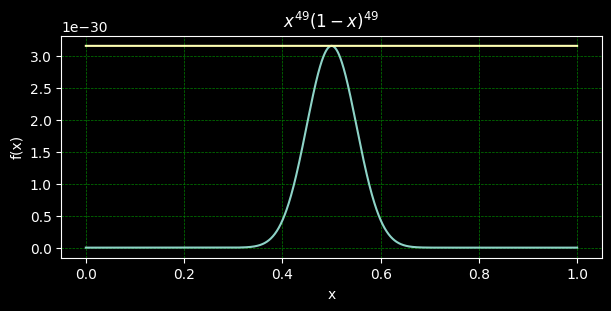

In [20]:
'''
Volviendo a graficar con esa limitante de M

'''
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')  
ax.set_title("")
M = 3.1554436208840472e-30
datos_x = np.arange(0,1,0.0005)
datos_y = [(ma.pow(x,49)*(ma.pow(1-x,49))) for x in datos_x]
plt.plot(datos_x,datos_y)
plt.plot(datos_x, [M for x in datos_x])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$x^{49}(1-x)^{49}$ ")
plt.show()

A continuación creamos dos funciones a partir de la función que hicimos en el primer ejercicio, variando los intervalos donde queremos que se generen estos números. La primera va a regresarnos números pseudoaleatorios entre 0 y 0.55 y la segunda entre 0 y $M$

In [6]:
#Tomando M = 3.1554436208840472e-30
#generar numeros pseudoaleatorios entre el 0 y el 0.55
#vamos a modificar un poco la  función del cuadrado de arriba, para regresar numeros entre el 0 y 0.55 esos numeros serán a lo largo del Eje X
def generador_cuadrado_integral_x(x_0, N):
    i = 0
    x_0 = x_0**2
    x_0 = str(x_0)
    numeros_generados = []
    while i < N:
        while len(x_0) < 8:
            x_0 = "0" + x_0
        numeros_generados.append(int(x_0[2:6]))
        x_0 = int(x_0[2:6])
        x_0 = x_0**2
        x_0 = str(x_0)
        i = i + 1
    numeros_normalizados = [ 0.55*n/10000 for n in numeros_generados]
    return numeros_normalizados

# .............. Correción de la otra función entre 0 y M ...........#
M = 3.1554436208840472e-30
def generador_cuadrado_integral_y(x_0, N):
    i = 0
    x_0 = x_0**2
    x_0 = str(x_0)
    numeros_generados = []
    while i < N:
        while len(x_0) < 8:
            x_0 = "0" + x_0
        numeros_generados.append(int(x_0[2:6]))
        x_0 = int(x_0[2:6])
        x_0 = x_0**2
        x_0 = str(x_0)
        i = i + 1
    numeros_normalizados = [ M*n/10000 for n in numeros_generados]
    return numeros_normalizados


In [7]:
valores_x = generador_cuadrado_integral_x(4897, 500)  # aquí obtenemos la lista que va a tener la coordenada x de nuestros puntos
#print(valores_x)
valores_y = generador_cuadrado_integral_y(4325,500)  # aquí obtenemos la lista que va a tener la coordenada y de nuestros puntos
#print(valores_y)
coordenadas = list(zip(valores_x, valores_y)) # con esta linea obtenemos una lista que tiene como elementos coordenadas,estás coordenadas se obtienen de las listas de arriba
print(coordenadas)

[(0.53933, 2.2264810188957837e-30), (0.08668000000000001, 2.4836496739978336e-30), (0.266035, 3.0058755932541434e-30), (0.218075, 2.3495433201102617e-30), (0.39666, 1.3975459796895446e-30), (0.007095000000000001, 1.943753270464573e-30), (0.009130000000000001, 2.983787487907955e-30), (0.015125, 1.3123490019256752e-30), (0.04158, 9.377978441267389e-31), (0.314325, 2.627537903110146e-30), (0.36366000000000004, 1.0693798431176035e-30), (0.39517500000000005, 1.5313367892150281e-30), (0.34331000000000006, 1.7405427012796404e-30), (0.529375, 1.344850071220781e-30), (0.35233000000000003, 5.193860199975142e-31), (0.02024, 2.238156160293055e-30), (0.07447000000000001, 9.80080788646585e-31), (0.45831500000000003, 2.0422031114361554e-30), (0.24134, 2.7979318586378848e-30), (0.139975, 1.967734641983292e-30), (0.26235, 2.80077175789668e-30), (0.41409500000000005, 2.4716589882384742e-30), (0.37719, 1.122706840310544e-30), (0.017655, 2.0803839792488523e-30), (0.05665, 1.4754854371253805e-30), (0.03349

In [8]:
#Esta función es la que vamos a aproximar su integral, la definimos para  poder usarla y acotar los valores de y 
def f(x):
    return ma.pow(x,49)*(ma.pow(1-x,49))

In [12]:
'''
Creamos una contador que irá aumentando de uno en uno, si los puntos que evaluamos en el if cumplen con quedar abajo de la función 
de lo contrario se suma un cero. AL terminar de recorrer todos las coordenadas obtenemos la probabilidad dividiento entre el número de 
coordenadas
'''
contador = 0
for x1,y1 in coordenadas:
    if 0<= x1<= 0.55 and f(0) <= y1 <= f(0.55):
        contador = contador + 1 

p = contador/ len(coordenadas)
print(f'La probabilidad obtenida es {p}')

La probabilidad obtenida es 0.726


In [13]:
area_bajo_curva = M*0.55*p
print(f'Con  lo de arriba llegamos a que el área aproximada de la función f(x) es {area_bajo_curva}')

Con  lo de arriba llegamos a que el área aproximada de la función f(x) es 1.2599686378190002e-30


Pero nos falta multplicar por las constantes $\tfrac{\Gamma(100)}{\Gamma(50)\Gamma(50)}$, por eso sigue el siguiente bloque de código

In [16]:
#Falta multiplicarlas por gamma, las constantes
#gamma(99 + 1) = 99!
#gamma(49 +1 ) = 49!
gamma_100 = np.math.factorial(99)
gamma_50 = np.math.factorial(49)

C = gamma_100/ma.pow(gamma_50,2)
integral_aproximada = C*area_bajo_curva
print(f'Concluyendo el ejercicio 2, llegamos a que aproximadamente el valor de la integral es {integral_aproximada} unidades de área ')

Concluyendo el ejercicio 2, llegamos a que aproximadamente el valor de la integral es 3.1779982488700487 unidades de área 


## Ejercicio 3

Ahora, como todo buen probabilista, nos meteremos un poco en el mundo de los juegos de azar. En este ejercicio deberán simular una variable aleatoria que simule un dado justo y una que simule un dado cargado. <br>
**Dado Justo**:<br>
Deberán simular un dado justo que tenga $k$ caras; es decir que puede salir cada cara con probabilidad $1/k$. Programen una función que reciba el número de caras que tendrá el dado y regrese alguna de ellas con igual probabilidad. <bR>
**Pista**: Recuerden la función de distribución de la uniforme discreta.

**Dado Cargado**:<br>
Ahora, queremos modelar un dado cargado con $k$ caras; es decir que no todas las caras tienen la misma probabilidad de salir. Para poder simular este dado su función deberá recibir un vector de probabilidades $(p_1 ,p_2 ,...,p_k)$ donde $p_i$ es la probabilidad de obtener la i-ésima cara del dado. Recuerden que se debe cumplir que $p_1 +p_2 +...+p_k =1$. <br>
**Pista**: Su función debe ser muy similar a la del dado justo pero ahora en lugar de aparecer las probabilidades $1/k$ debarán aparecer las $p_i$.

**Solución**


**Dado Justo**


Vamos a empezar implementando la función para una dado justo de $k$ caras, la idea principal para resolver este ejercicio que esa k va a particionar el intervalo $[0,1]$ en k partes después hacemos uso de la función que nos genera números pseudoaleatorios del ejercicio 1 de la práctica, con esto iremos calculando las frecuencias de cada cara 

In [4]:
def dadoJusto(k):
    '''
    Documentación: Lo que tengo en mente es particionar el conjunto 0 a 1  en 6 partes 
    Para el entendimiento de nuestra simulación. Pensando en un dado de 6 caras, al particionar el intervalo 0 a 1 en g partes, el primer
    pedazo corresponde a la cara 1, el siguiente pedazo a la cara 2 y así sucesivamente
    
    '''
    intervaloParticion = np.arange(0,1.1,1/k) # partición del intervalo 0 a 1 en k partes, dependiendo del input del usuario
    aleatorios_generados = generador_cuadrado(9325, 10000) # generamos los números aleatorios
    cara1Frecuencia = sum([1 if intervaloParticion[0] <= num <= intervaloParticion[1] else 0 for num in aleatorios_generados])/len(aleatorios_generados)
    cara2Frecuencia = sum([1 if intervaloParticion[1] <= num <= intervaloParticion[2] else 0 for num in aleatorios_generados])/len(aleatorios_generados)
    cara3Frecuencia = sum([1 if intervaloParticion[2] <= num <= intervaloParticion[3] else 0 for num in aleatorios_generados])/len(aleatorios_generados)
    cara4Frecuencia = sum([1 if intervaloParticion[3] <= num <= intervaloParticion[4] else 0 for num in aleatorios_generados])/len(aleatorios_generados)

    return cara1Frecuencia,cara2Frecuencia, cara3Frecuencia, cara4Frecuencia

In [6]:
dadoJusto(8)

(0.0014, 0.2493, 0.0009, 0.2491)

Del dado justo podemos concluir que esta simulación no es muy buena por que no se acerca a los valores reales de la probabilidad para un dado justo que sería $\frac{1}{k}$ para un dado con $k$ caras. Podemos notar que hicimos una simulación para una dado Justo de 6 caras y se esperaría que cada cara saliera con probabilidad $\frac{1}{6}$. Esto se debe al error que se encuentra de ir generando números pseudoaleatorios entre el 0 y 1 pues recordemos es una aproximación y además que este método del cuadrado funciona no del todo bien cuando no elegimos la semilla correcta.

**Dado Cargado**

Siguien el hint para este inciso para implementar la función que nos simula un dado cargado(las caras tienen distinta probabilidad de salir). Comenzamos definiendo un vector de probabilidades que es el input de nuestra función. Esta función trabaja de la siguiente forma:

- El vector de probabilidad dicta como se particiona el intervalo $[0,1]$ recordar que la $p_i$ corresponde a la probabilidad de que te salga la cara i-ésima. Entonces la probabilidad que tenga mas proba será la que tenga más proporción del intervalo.

- Luego generamos numeros pseudoaleatorios con la función que programos ejercicios atrás
- Finalmente empezamos a calcular las frecuencias por caras y las regresamos

In [34]:
#Para un vector de probabilidades en particular
vectorProbabilidades = [0.05, 0.25, 0.5, 0.2]
sum(vectorProbabilidades) 
def dadoPesado(probabilidades):
    intervalo_particion = np.array([0,0.05, 0.3, 0.8,1])
    aleatorios_generados = generador_cuadrado(4897,500)
    cara1Frecuencia = sum([1 if intervalo_particion[0] <= num <= intervalo_particion[1] else 0 for num in aleatorios_generados])/len(aleatorios_generados)
    cara2Frecuencia = sum([1 if intervalo_particion[1] <= num <= intervalo_particion[2] else 0 for num in aleatorios_generados])/len(aleatorios_generados)
    cara3Frecuencia = sum([1 if intervalo_particion[2] <= num <= intervalo_particion[3] else 0 for num in aleatorios_generados])/len(aleatorios_generados)
    cara4Frecuencia = sum([1 if intervalo_particion[3] <= num <= intervalo_particion[4] else 0 for num in aleatorios_generados])/len(aleatorios_generados)
    return cara1Frecuencia, cara2Frecuencia, cara3Frecuencia, cara4Frecuencia

In [33]:
dadoPesado(vectorProbabilidades)

(0.01, 0.25, 0.5, 0.24)

In [7]:
#Para un vector de probabilidades en particular
vectorProbabilidades = [0.05, 0.75, 0.1, 0.1]
sum(vectorProbabilidades) 
def dadoPesado(probabilidades):
    intervalo_particion = np.array([0,0.05, 0.8, 0.9,1])
    aleatorios_generados = generador_cuadrado(4897,500)
    cara1Frecuencia = sum([1 if intervalo_particion[0] <= num <= intervalo_particion[1] else 0 for num in aleatorios_generados])/len(aleatorios_generados)
    cara2Frecuencia = sum([1 if intervalo_particion[1] <= num <= intervalo_particion[2] else 0 for num in aleatorios_generados])/len(aleatorios_generados)
    cara3Frecuencia = sum([1 if intervalo_particion[2] <= num <= intervalo_particion[3] else 0 for num in aleatorios_generados])/len(aleatorios_generados)
    cara4Frecuencia = sum([1 if intervalo_particion[3] <= num <= intervalo_particion[4] else 0 for num in aleatorios_generados])/len(aleatorios_generados)
    return cara1Frecuencia, cara2Frecuencia, cara3Frecuencia, cara4Frecuencia

In [8]:
dadoPesado(vectorProbabilidades)

(0.01, 0.75, 0.236, 0.004)

Podemos notar que se simula mejor el Dado Cargado hicimos dos pruebas(se nos complicó programar la función general) con vectores de probabilidad distintos y tomando en cuenta la proporción que ya les toca por estar cargado el dado y el resultado se aproxima mucho mejor, es decir las frecuencias de aparición son más grandes para las caras con mayor probabilidad